# Opgaver i uge 9
# Opgave 1
### 1.1 Vurder datasættet
Vurder datasættet fra rainforest.
- beslut om du vil fjerne kolonner eller impute værdier, eller en blanding.
- Lad os se, hvad der giver det bedste resultat.

In [22]:
# Importerer typiske hjælpebiblioteker
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# importer sklearn-pakkerne der skal bruges
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [4]:
input_file = "..\\input\\rainforest.csv"
properties = pd.read_csv(input_file) # Her indlæses i en dataframe
properties.info()
properties.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  65 non-null     int64  
 1   dbh         65 non-null     int64  
 2   wood        64 non-null     float64
 3   bark        4 non-null      float64
 4   root        13 non-null     float64
 5   rootsk      13 non-null     float64
 6   branch      43 non-null     float64
 7   species     65 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 4.2+ KB


,Unnamed: 0,dbh,wood,bark,root,rootsk,branch,species
0,27,6,NaN,NaN,6.0,0.3,NaN,Acacia mabellae
1,61,23,353.0,NaN,135.0,13.0,35.0,Acacia mabellae
2,62,20,208.0,NaN,NaN,NaN,41.0,Acacia mabellae
3,63,23,445.0,NaN,NaN,NaN,50.0,Acacia mabellae
4,65,24,590.0,NaN,NaN,NaN,NaN,Acacia mabellae


In [16]:
prop_dropna = properties.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 38 to 41
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4 non-null      int64  
 1   dbh         4 non-null      int64  
 2   wood        4 non-null      float64
 3   bark        4 non-null      float64
 4   root        4 non-null      float64
 5   rootsk      4 non-null      float64
 6   branch      4 non-null      float64
 7   species     4 non-null      object 
dtypes: float64(5), int64(2), object(1)
memory usage: 288.0+ bytes


TypeError: 'tuple' object is not callable

In [ ]:
prop_dropna.info()

In [ ]:
prop_dropna.head()

In [20]:
np.shape(prop_dropna)


TypeError: 'tuple' object is not callable

In [38]:
y_prop = properties['species'].values
X_prop = properties.drop('species', axis=1).values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_prop)
X_prop_imp = imp.transform(X_prop)
X_prop_imp = pd.DataFrame(X_prop_imp)
X_prop_imp.head()
print(y_prop)

['Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae'
 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae'
 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae'
 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae' 'Acacia mabellae'
 'C. fraseri' 'C. fraseri' 'C. fraseri' 'C. fraseri' 'C. fraseri'
 'C. fraseri' 'C. fraseri' 'C. fraseri' 'C. fraseri' 'C. fraseri'
 'C. fraseri' 'C. fraseri' 'Acmena smithii' 'Acmena smithii'
 'Acmena smithii' 'Acmena smithii' 'Acmena smithii' 'Acmena smithii'
 'Acmena smithii' 'Acmena smithii' 'Acmena smithii' 'Acmena smithii'
 'B. myrtifolia' 'B. myrtifolia' 'B. myrtifolia' 'B. myrtifolia'
 'B. myrtifolia' 'B. myrtifolia' 'B. myrtifolia' 'B. myrtifolia'
 'B. myrtifolia' 'B. myrtifolia' 'B. myrtifolia' 'Acmena smithii'
 'Acmena smithii' 'Acmena smithii' 'Acmena smithii' 'Acmena smithii'
 'Acmena smithii' 'Acmena smithii' 'Acmena smithii' 'Acmena smithii'
 'Acmena smithii' 'Acmena smithii' 'Acmena 

## 1.2 Del sættet op
Del sættet op i samples og labels, så du har et datasæt, som kun består af talværdier for de enkelte træsorter.

In [39]:


plt.scatter(X_prop_imp)
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

## 1.3 Udfør clustering
Udfør en clustering med KMeans:
- Hvor mange clusters skal vi inddele i?
- Hvordan finder vi et godt antal?

## 1.4 Sammenhold
Sammenhold wood mod branch i et scatterplot

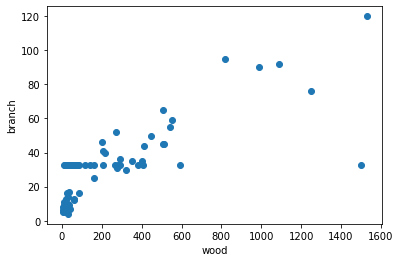

In [41]:
wood = X_prop_imp[2].values
branch = X_prop_imp[6].values
plt.scatter(wood,branch)
plt.xlabel('wood')
plt.ylabel('branch')
plt.show()

## 1.5 Cross Tabulation
Udfør en cross tabulation
- Hvor gode er dine resultater?

## 1.6 StandardScaler og Pipeline
Brug en StandardScaler og en Pipeline til at få bedre resultater
- Test igen med cross tabulation.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pl = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans())])

## 1.7 Intristic dimension
Check for intristic dimensions
- Lav en dimensionality reduction der svarer til bedste bud
- Blev dine resultater bedre?

## Opgave 2
Classify song genres from audio data (fra datacamp projects)